In [1]:
# author federico.corradi@imec.nl
# 2021 8 Ghz microdoppler radar gesture dataset

import numpy as np
from skimage.transform import resize
import matplotlib as plt
from pylab import *

In [7]:
## data
DATA_PATH = '/mnt/space/datasets/radar8ghz/processed/' #'data/' 

data_raw_ = np.load(DATA_PATH+"rawdata.npy")
data_udoppler_ = np.load(DATA_PATH+"udoppler.npy")
data_delta_udoppler_small =  np.load(DATA_PATH+"udoppler_small.npy")
data_y_ = np.load(DATA_PATH+"labeldata.npy")


def normalize_imges(data): #normalize pixel values to [-1, 1] 
    for i in range(data.shape[1]):
        img = data[:,i]
        if np.max(img) - np.min(img) > 0:
            data[:,i] = (img - np.min(img))/(np.max(img) - np.min(img)) #no sqrt normally
            #data[i] = np.sqrt((img - min(img))/(max(img) - min(img))) #no sqrt normally
        else:
            data[:,i] = 0
            
    return data


def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    

from skimage.transform import resize
data_x_s = []
data_y_s = []
for i in range(len(data_delta_udoppler_small)):
    this_x = (((np.reshape(data_delta_udoppler_small[i],[28,28])))).astype('float32')
    this_x = resize(this_x, [16,16])
    mean_  = np.mean(this_x)
    std_ = np.std(this_x)
    thr_ = mean_ + 0.15*std_
    thr_m = mean_ - 0.15*std_
    idx_freq = np.where(this_x >=  thr_)
    idx_freq_n = np.where(this_x <  thr_m)
    this_x[:] = 0
    this_x[idx_freq] = 1
    #this_x[idx_freq_n] = 1
    this_y = np.squeeze( np.reshape(data_y_[i], [-1]) ) 
    data_x_s.append( this_x ) 
    data_y_s.append( this_y )

In [8]:
Slow_Time_len = 511
def plot_image(img_id):
    plt.figure(figsize=(12,12))
    plt.subplot(3,1,1)
    plt.imshow(data_raw_[img_id], cmap="rainbow", interpolation="nearest", aspect="auto")
    plt.vlines(Slow_Time_len-1, 0,191, linestyles='dashed')
    plt.vlines(Slow_Time_len*2-1, 0,191, linestyles='dashed')
    plt.vlines(Slow_Time_len*3-1, 0,191, linestyles='dashed')
    x_ticks = np.array([1, 512, 512,512]).astype("int")
    plt.xticks(np.linspace(0,1530,4), x_ticks)
    plt.xlabel("ADC Channel", fontsize=18)
    plt.ylabel("Chirp number", fontsize=18)
    plt.colorbar()
    plt.tight_layout()
    plt.subplot(3,1,2)
    plt.imshow(data_udoppler_[img_id] , cmap="rainbow", aspect="auto")
    plt.xticks(np.linspace(0,71,5), np.linspace(0,714,5))
    y_ticks = np.linspace(-416.66, 416.66, 5).astype("int") ##1/0.0012 =833.33 hz as it is single adc then -416.66 to 416.666 Hz
    plt.yticks(np.linspace(0,192,5), y_ticks)
    plt.xlabel("Time (ms)", fontsize=18)
    plt.ylabel("Frequency (Hz)", fontsize=18)
    plt.colorbar()
    plt.subplot(3,1,3)
    plt.imshow(data_x_s[img_id], cmap="gray", aspect="auto")
    y_ticks = np.linspace(-416.66, 416.66, 5).astype("int")
    plt.xticks(np.linspace(0,15,5), np.linspace(0,714,5))
    plt.yticks(np.linspace(0,15,5), y_ticks)
    plt.ylabel("Frequency (Hz)", fontsize=18)
    plt.xlabel("Time (ms)", fontsize=18)
    plt.title("label {}".format(data_y_[img_id]))
    plt.colorbar()
    

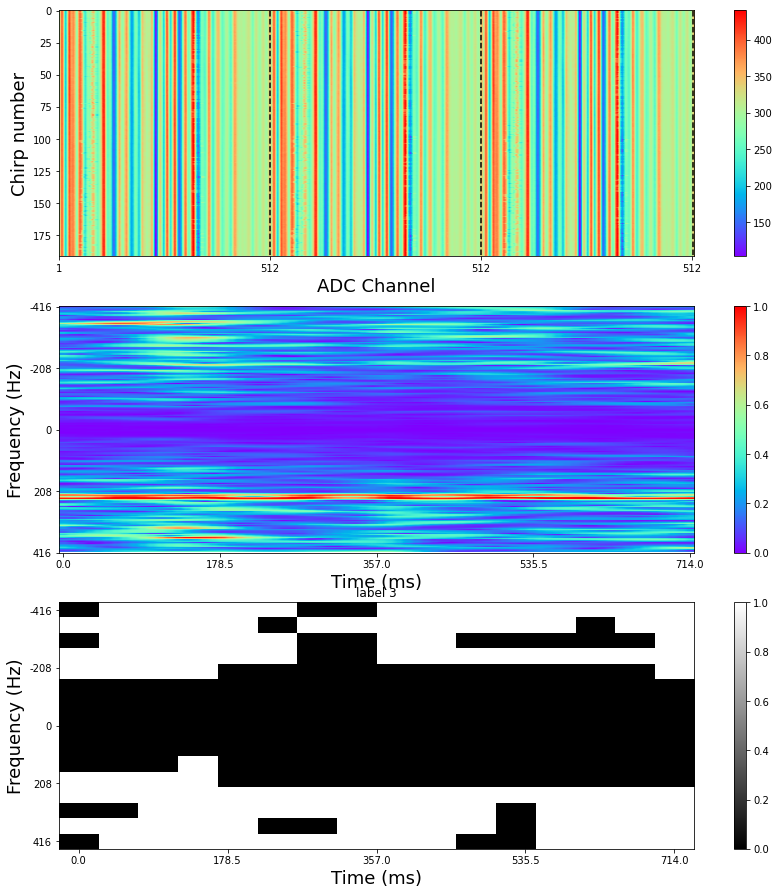

In [9]:
plot_image(1000)

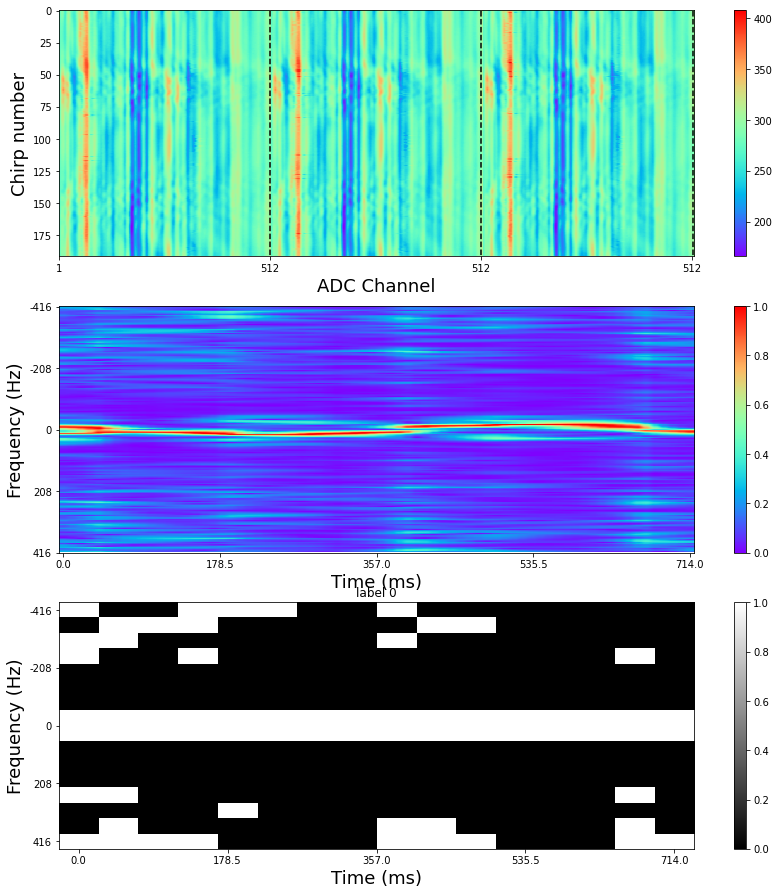

In [10]:
plot_image(10)